<IPython.core.display.Javascript object>


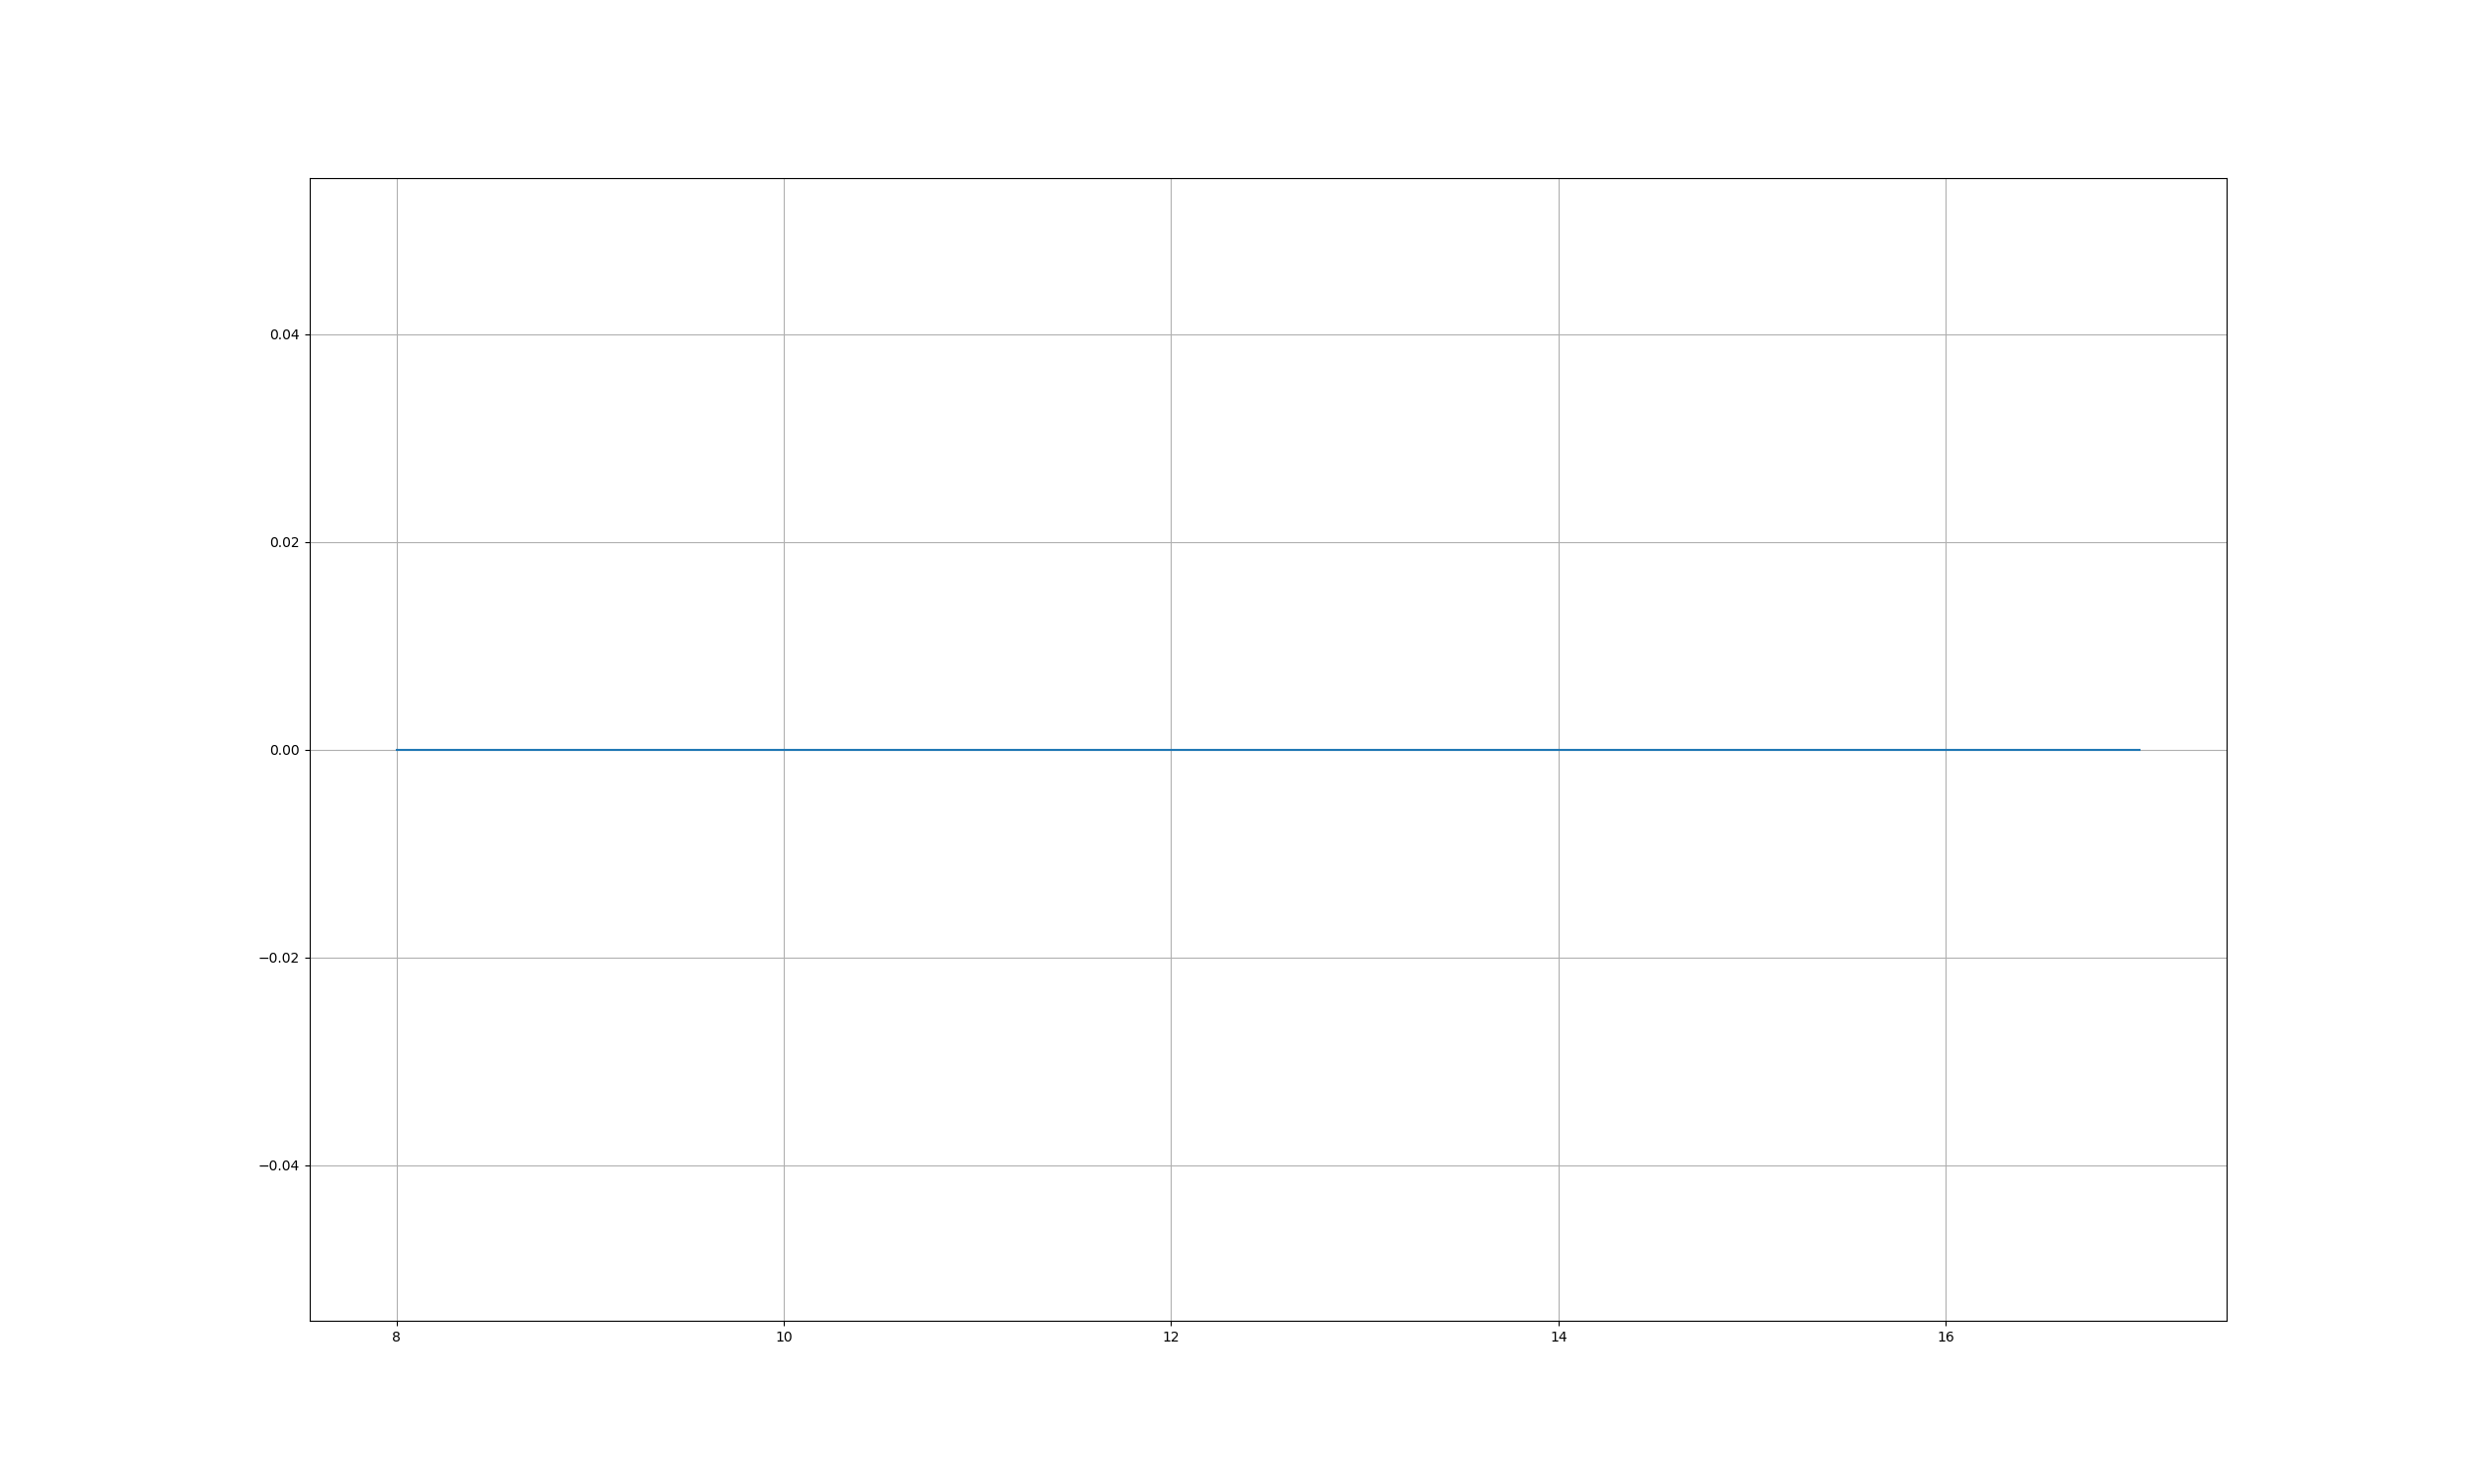

<IPython.core.display.Javascript object>


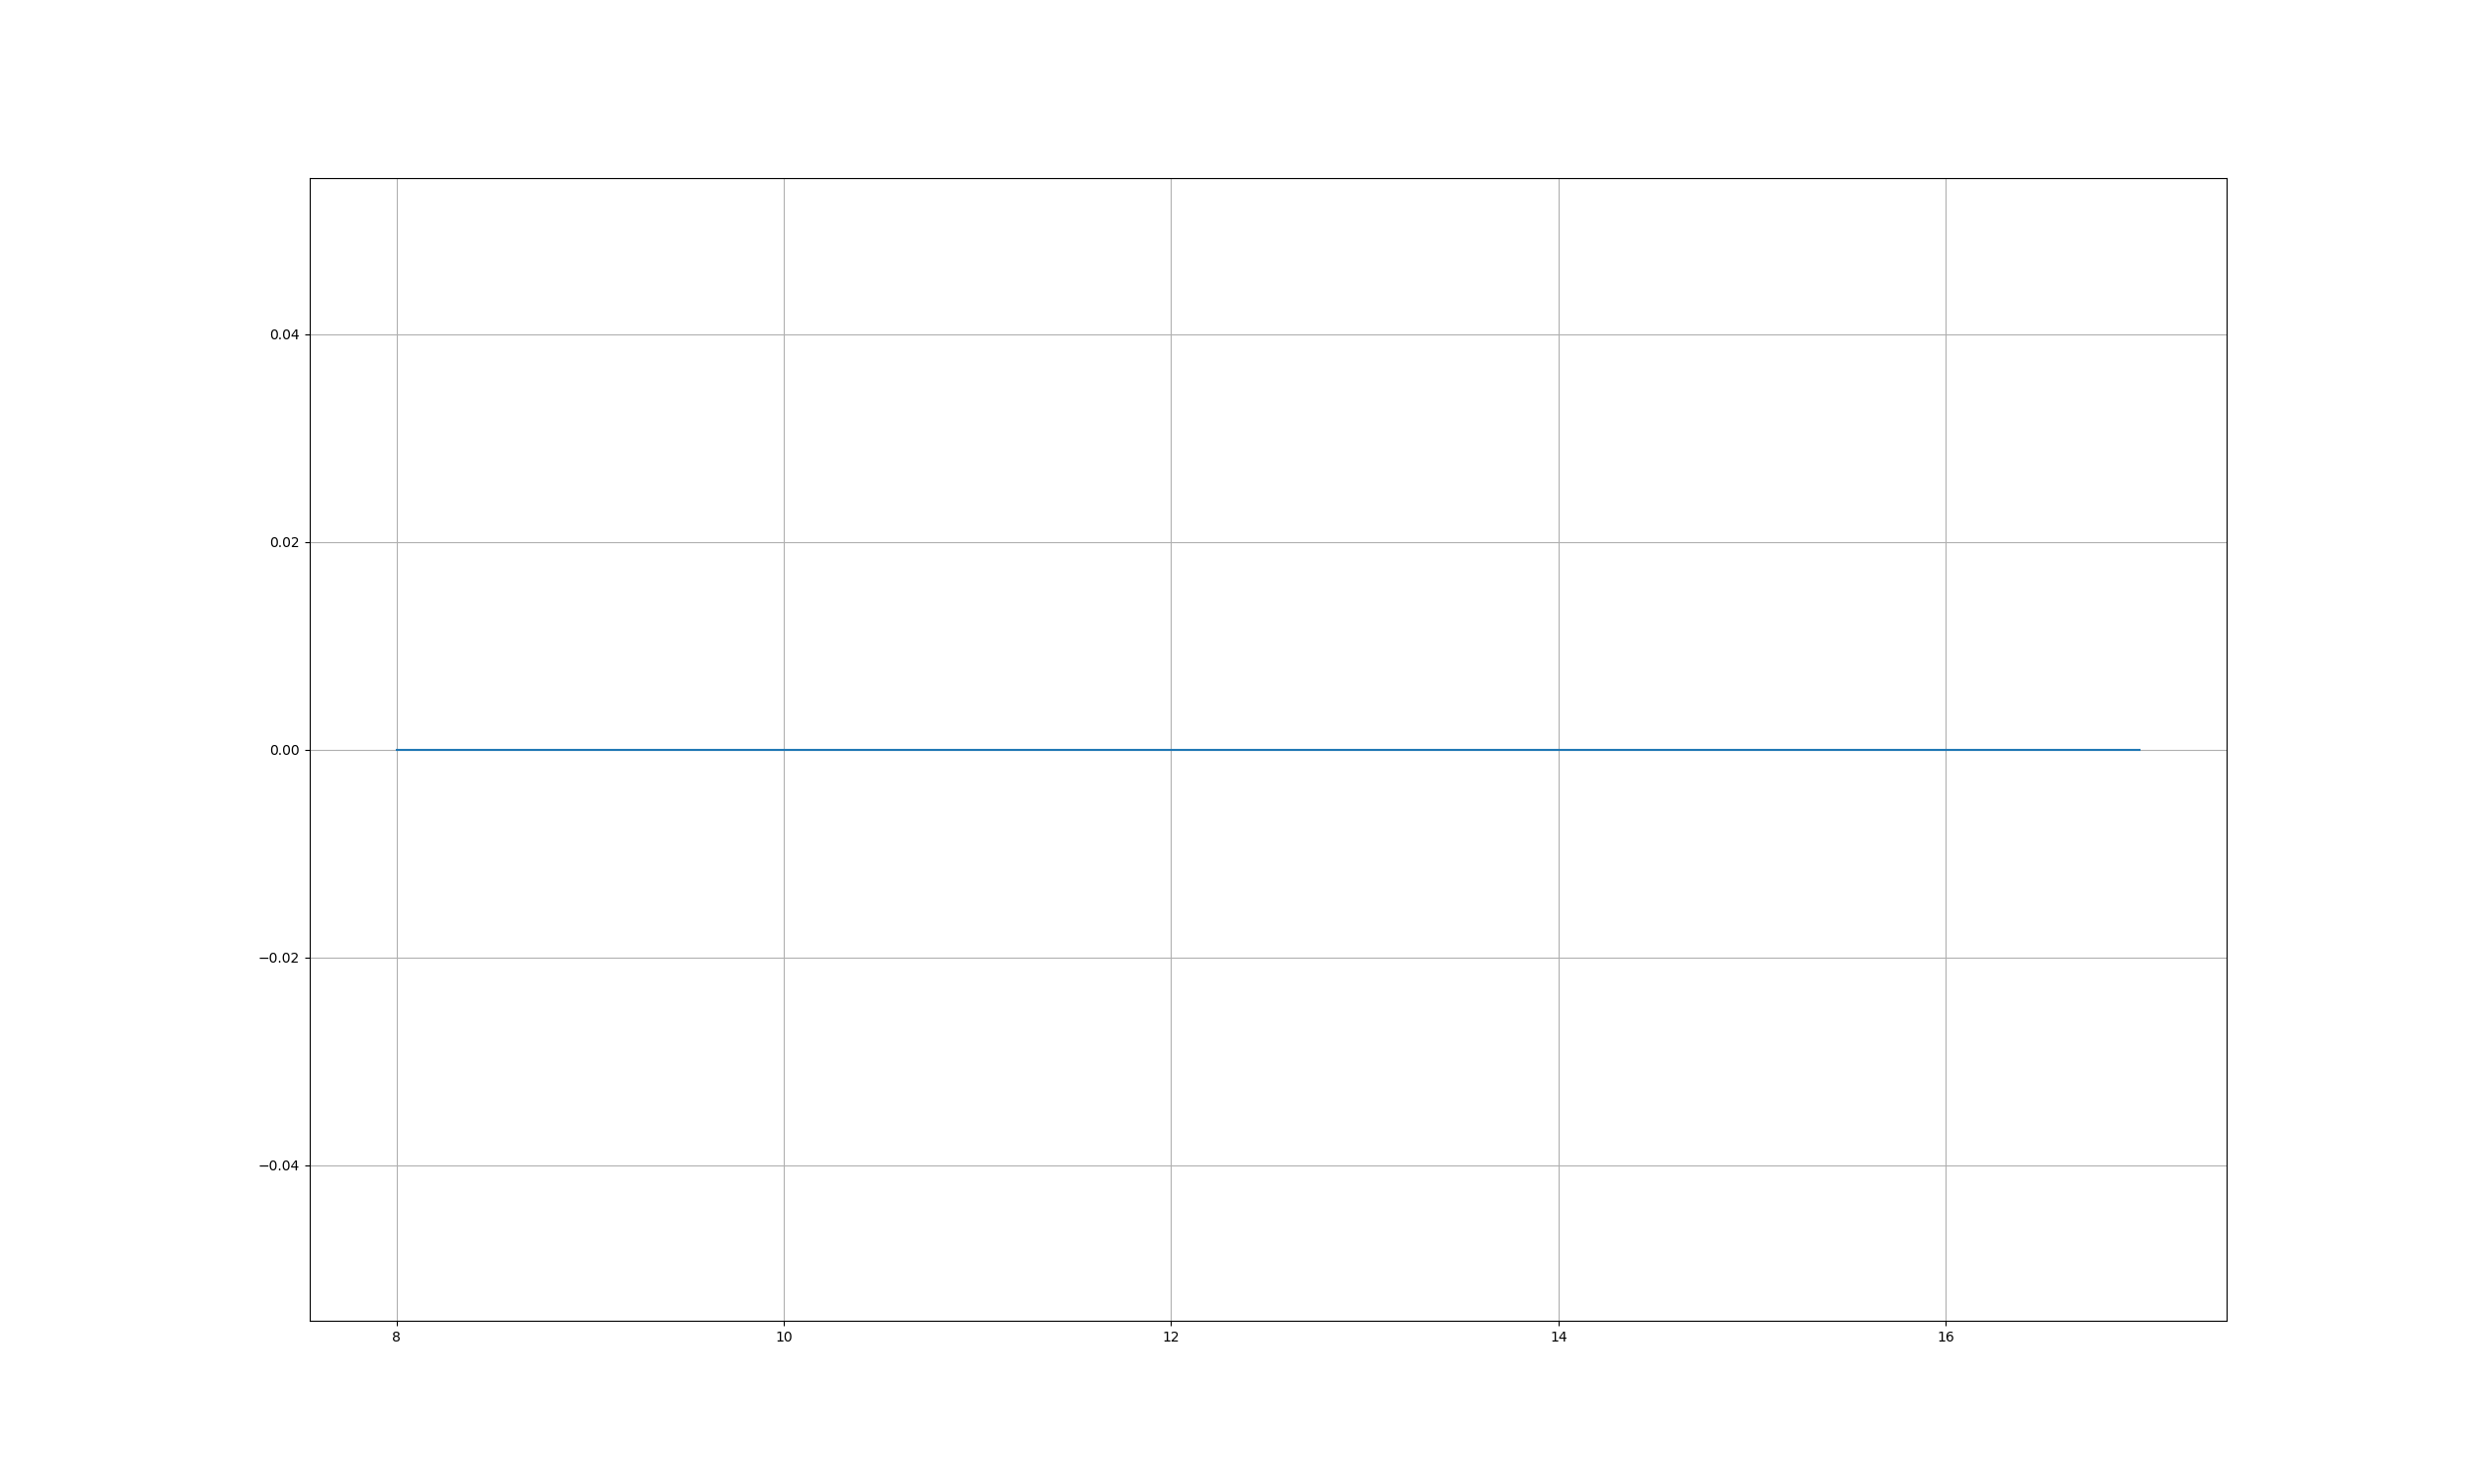

<IPython.core.display.Javascript object>


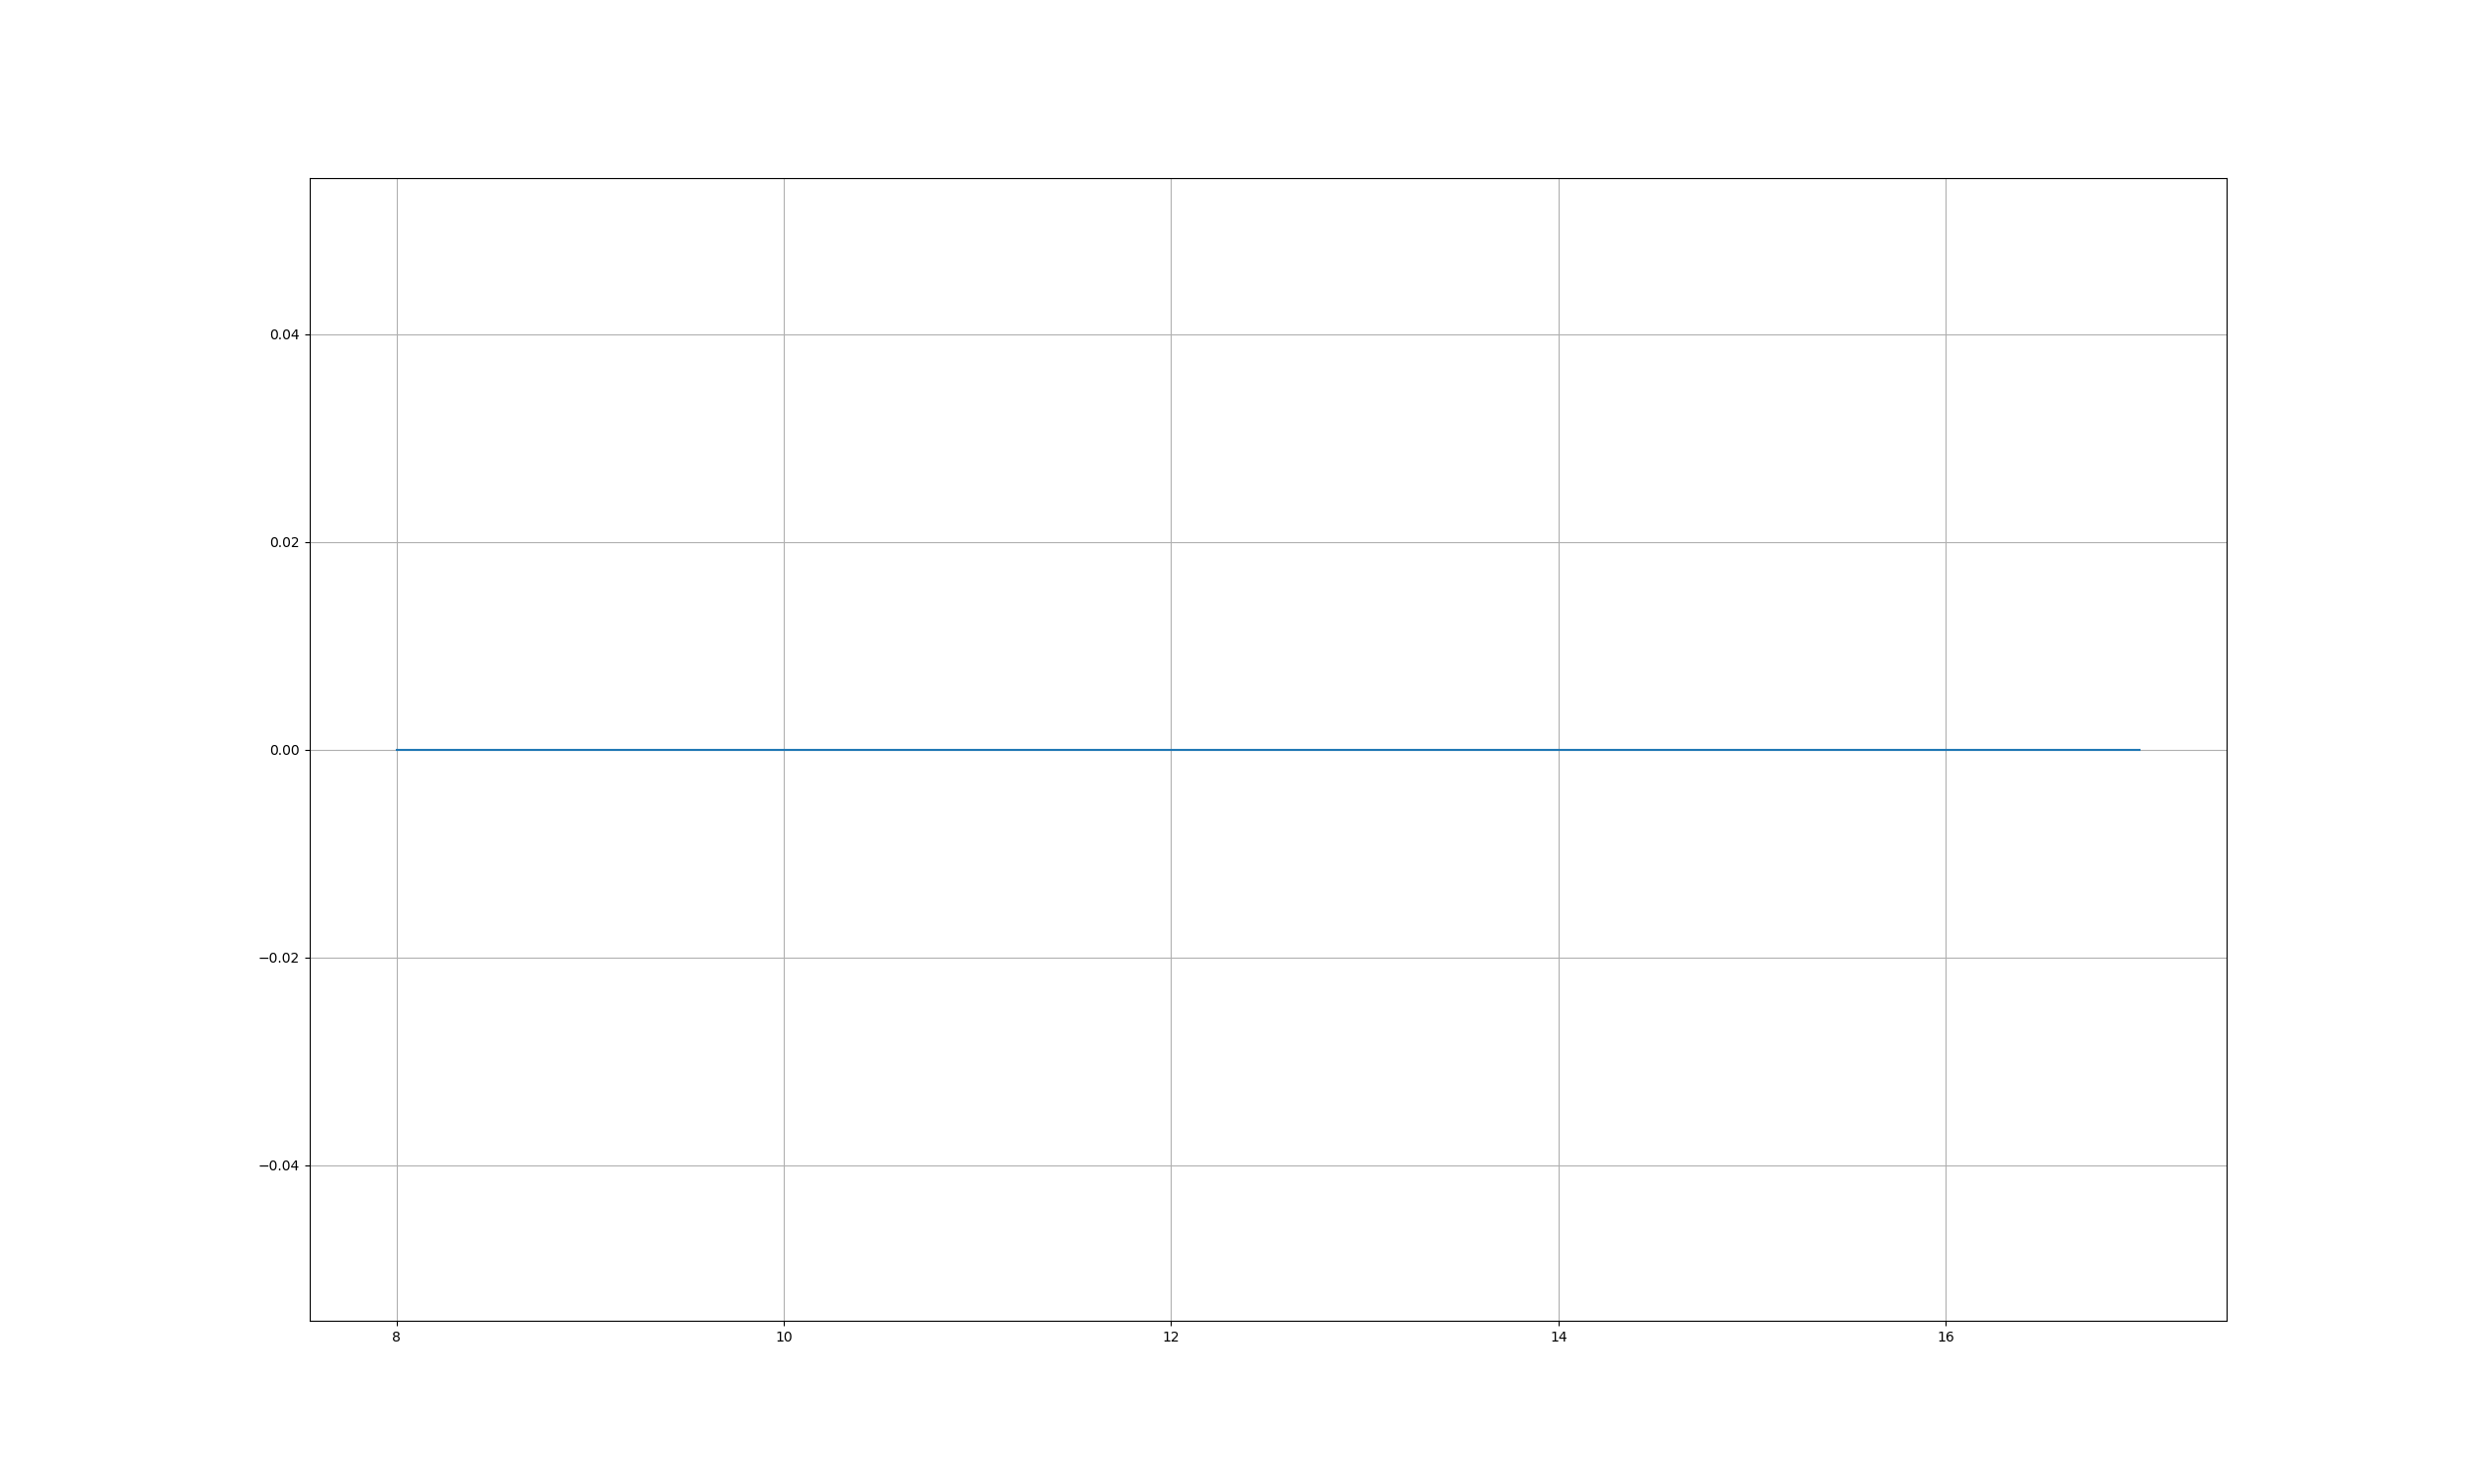

port busy, restart
data reading started press q to stop
closing com COM4
'str' object has no attribute 'close'
closing com COM4


AttributeError: 'str' object has no attribute 'close'

In [4]:
# Importing Libraries
import serial  #pip install pyserial
import time
import keyboard  #pip install keyboard
import pandas as pd 
import datetime   
import os
import matplotlib.pyplot as plt
import serial_read 
import DynamicUpdate
#use below line for jupyter notebook for display 
#----------------------
%matplotlib notebook
#----------------------
plt.ion()





    
def save_file(l1,l2,l3,t):
        dict  = {"time":t,'lead1': l1, 'lead2':l2 , 'lead3': l3}
        df=pd.DataFrame(dict) 
        timestamp= datetime.datetime.now().timestamp()
        file_name=str(timestamp)+".csv"
        
        if os.path.exists("ECG_CSV"):
            df.to_csv('ECG_CSV/'+file_name) 
        else:
            os.mkdir("ECG_CSV")
            df.to_csv('ECG_CSV/'+file_name) 
        print("file saved as:"+file_name)
        return
    
    

    
ar=serial_read.serial_read("COM4") 



dy_plot = DynamicUpdate.DynamicUpdate()
dy_plot.on_launch()

dy_plot1 = DynamicUpdate.DynamicUpdate()
dy_plot1.on_launch()

dy_plot2 = DynamicUpdate.DynamicUpdate()
dy_plot2.on_launch()

ar.init_arduino()#init arduino port ,might cause erro if port is not closed.Replug the board 
lead1=[]
lead2=[]
lead3=[]
time=[]
index=[]#temp for plotting 
try:
    print('data reading started press q to stop')
    while (keyboard.is_pressed('q')==False):# press keyboard q to stop the loop
            dat=str(ar.read_data()).strip("b'\\r\\n' ").split(',')#clean the string coming in byte format
            #print(dat,"end...")
            if(len(dat)<3):
                dat = ['0','0','0']
            if(str.isdigit(dat[0])==False or str.isdigit(dat[1])==False or str.isdigit(dat[2])==False):
                dat = ['0','0','0']
            
           # print(dat)
            lead1.append(int(dat[0]))
            lead2.append(int(dat[1]))
            lead3.append(int(dat[2]))
            time.append(datetime.datetime.now())  
            index.append(len(lead1))
            dy_plot.on_running(index[-10:],lead1[-10:])#sending last 10 points to plot 
            dy_plot1.on_running(index[-10:],lead2[-10:])
            dy_plot2.on_running(index[-10:],lead2[-10:])

          
    ar.close_com()
    save_file(lead1,lead2,lead3,time)#saving file after "q" is pressed otherwise won't 
  
except Exception as e :
        print(e)
        ar.close_com()
      
      
'''
//arduino side sample code 

void setup() {
  Serial.begin(115200);
}
// the loop routine runs over and over again forever:
void loop() {
  // read the input on analog pin 0:
 long  int t =20000000;
  // print out the value you read:
  Serial.print(t,DEC);
   Serial.print(",");
  Serial.print(t,DEC);
   Serial.print(",");
   Serial.print(t,DEC);
   
   Serial.println(" ");
  delay(100);        // delay in between reads for stability
}
'''


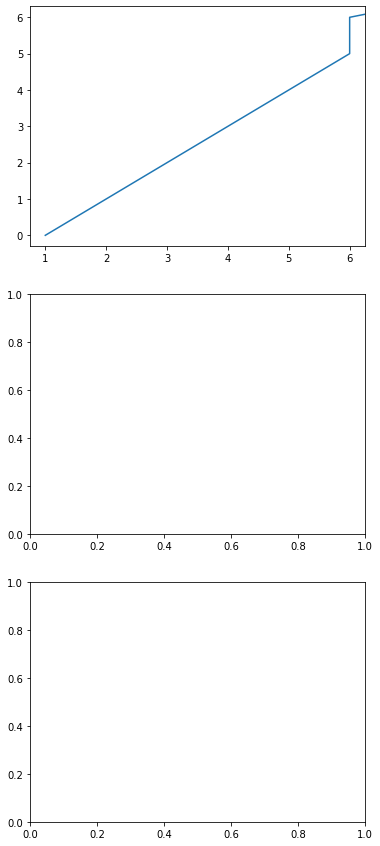

In [73]:
import matplotlib.pyplot as plt
import numpy as np
l,ax=plt.subplots(nrows=3)
l.set_figheight(15)

x=[1,2,3,4,5,6,6]
y=np.arange(7)

linesl1, = ax[0].plot(x,y)
x=[1,2,3,4,5,6,6,9,0]
y=np.arange(9)
linesl1.set_data(x,y)

In [1]:
import DynamicUpdate
plotly=DynamicUpdate.DynamicUpdate()
plotly.on_launch()

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

In [2]:
import numpy as np
e=np.arange(3)
for i in e:
    print (i)

0
1
2
